# Import Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Get Data

In [2]:
training = pd.read_csv('training.csv',sep=';',skipinitialspace=True,na_values='?')
test = pd.read_csv('test.csv',sep=';',skipinitialspace=True,na_values='?')
training= training.dropna()
test = test.dropna()
training = pd.concat([training,test],ignore_index=True)

In [3]:
training.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,39,State-gov,77516,Bachelors,13,Never-married,Adm-clerical,Not-in-family,White,Male,2174,0,40,United-States,<=50K
1,50,Self-emp-not-inc,83311,Bachelors,13,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,13,United-States,<=50K
2,38,Private,215646,HS-grad,9,Divorced,Handlers-cleaners,Not-in-family,White,Male,0,0,40,United-States,<=50K
3,53,Private,234721,11th,7,Married-civ-spouse,Handlers-cleaners,Husband,Black,Male,0,0,40,United-States,<=50K
4,28,Private,338409,Bachelors,13,Married-civ-spouse,Prof-specialty,Wife,Black,Female,0,0,40,Cuba,<=50K


In [4]:
test.head()

,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,salary-classification
0,25,Private,226802,11th,7,Never-married,Machine-op-inspct,Own-child,Black,Male,0,0,40,United-States,<=50K
1,38,Private,89814,HS-grad,9,Married-civ-spouse,Farming-fishing,Husband,White,Male,0,0,50,United-States,<=50K
2,28,Local-gov,336951,Assoc-acdm,12,Married-civ-spouse,Protective-serv,Husband,White,Male,0,0,40,United-States,>50K
3,44,Private,160323,Some-college,10,Married-civ-spouse,Machine-op-inspct,Husband,Black,Male,7688,0,40,United-States,>50K
5,34,Private,198693,10th,6,Never-married,Other-service,Not-in-family,White,Male,0,0,30,United-States,<=50K


<AxesSubplot:xlabel='sex', ylabel='count'>

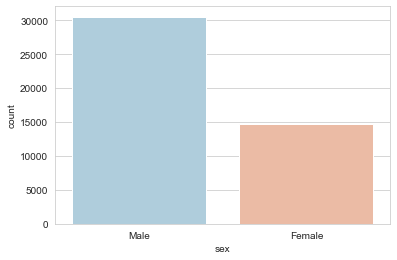

In [5]:
sns.set_style('whitegrid')
sns.countplot(x='sex',data=training,palette='RdBu_r')

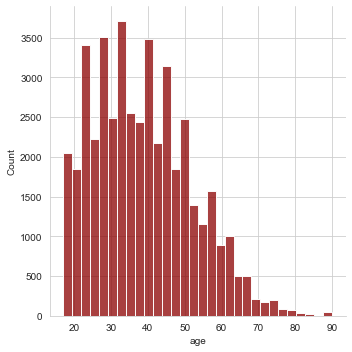

In [6]:
sns.displot(training['age'].dropna(),kde=False,color='darkred',bins=30)

<AxesSubplot:xlabel='education-num', ylabel='count'>

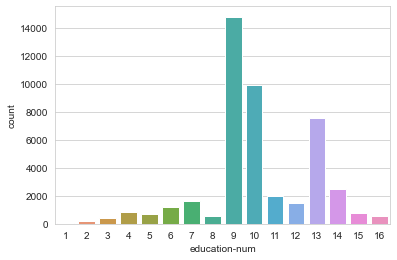

In [7]:
sns.countplot(x='education-num',data=training)

# Replace values of salary-classification

In [8]:
training = training.replace(to_replace="<=50K",value=0)
training = training.replace(to_replace=">50K",value=1)

test = test.replace(to_replace="<=50K",value=0)
test = test.replace(to_replace=">50K",value=1)

In [9]:
numeric_values = ['age','fnlwgt','education-num','capital-gain','capital-loss','hours-per-week','salary-classification']

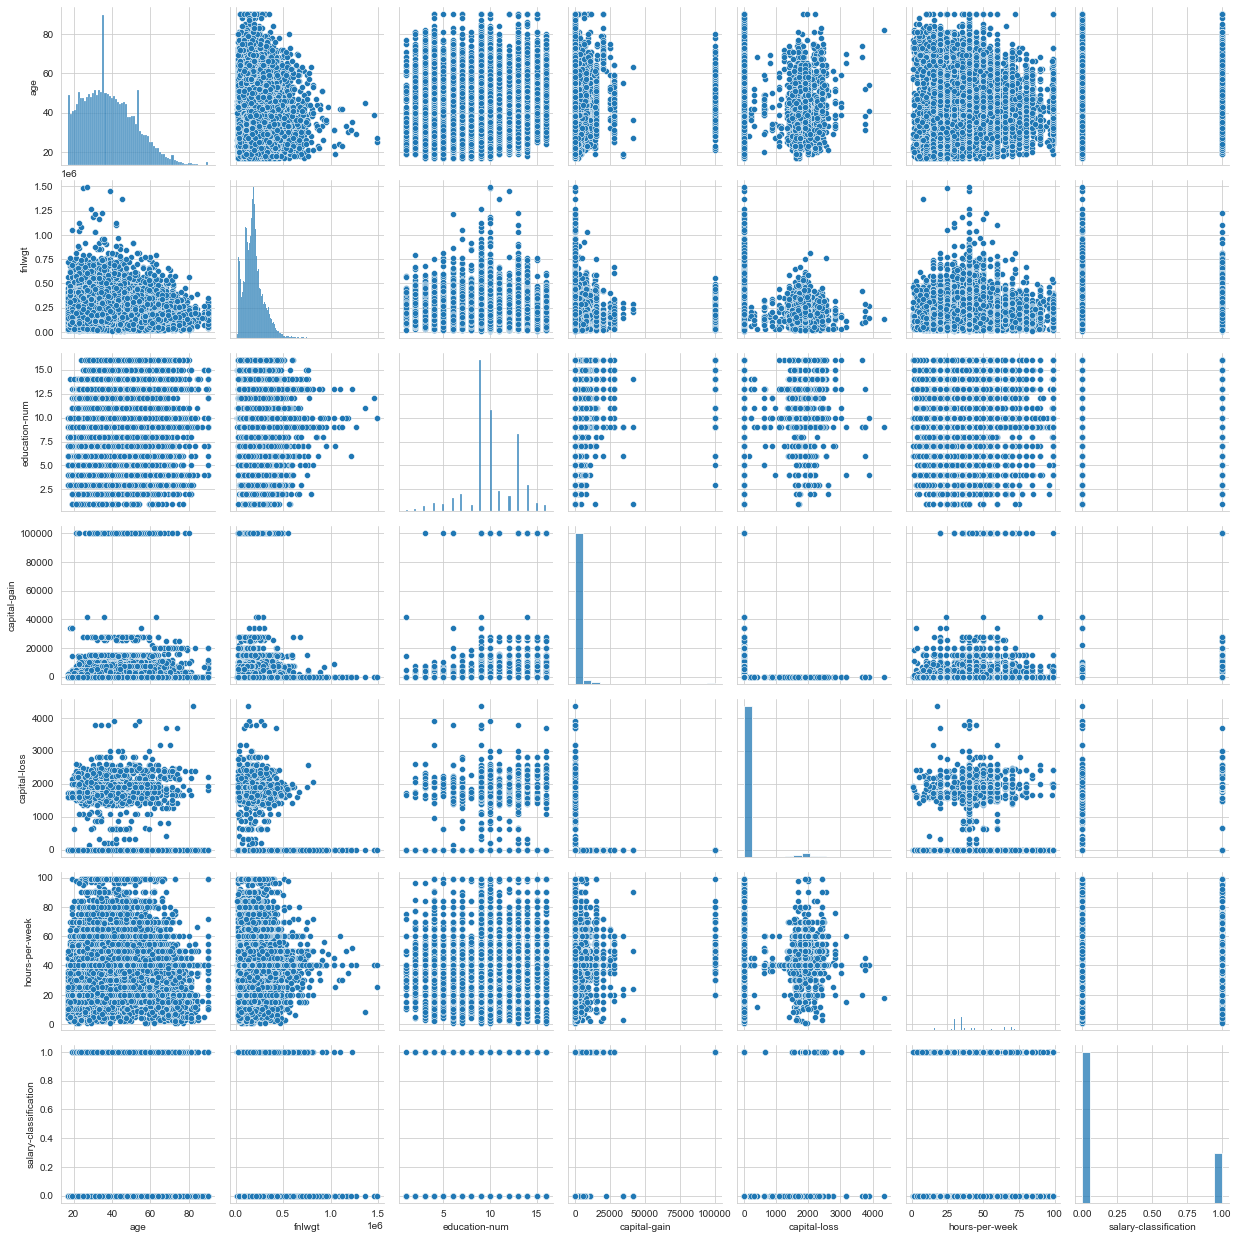

In [10]:
sns.pairplot(training[numeric_values])

# Contagem da classificação de salarios

C:\Users\rodod\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


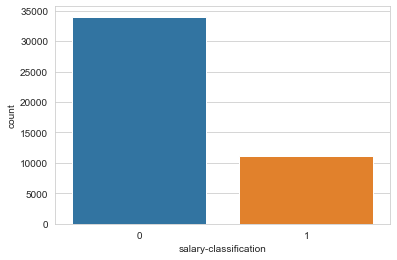

In [11]:
sns.countplot(training['salary-classification'],label="Count")
plt.show()

# Matriz de correlação entre valores numericos

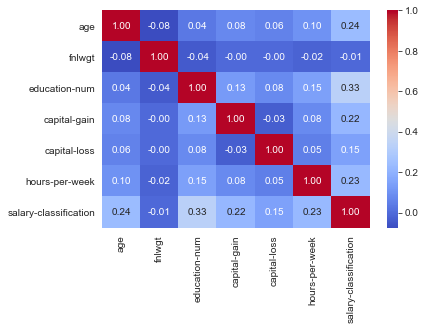

In [12]:
n_values_graph = sns.heatmap(training[numeric_values].corr(),annot=True,fmt = ".2f" ,cmap = "coolwarm")
plt.show()

# Grafico representativo de salary-classification vs education-num

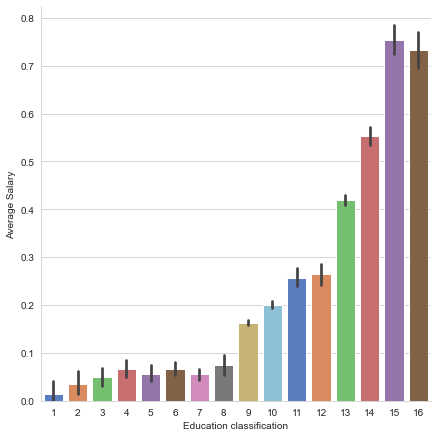

In [13]:
g = sns.catplot(x="education-num",y="salary-classification",data=training,kind="bar", height = 6 ,
palette = "muted")
g = g.set_ylabels("Average Salary")
g = g.set_xlabels("Education classification")
plt.show()

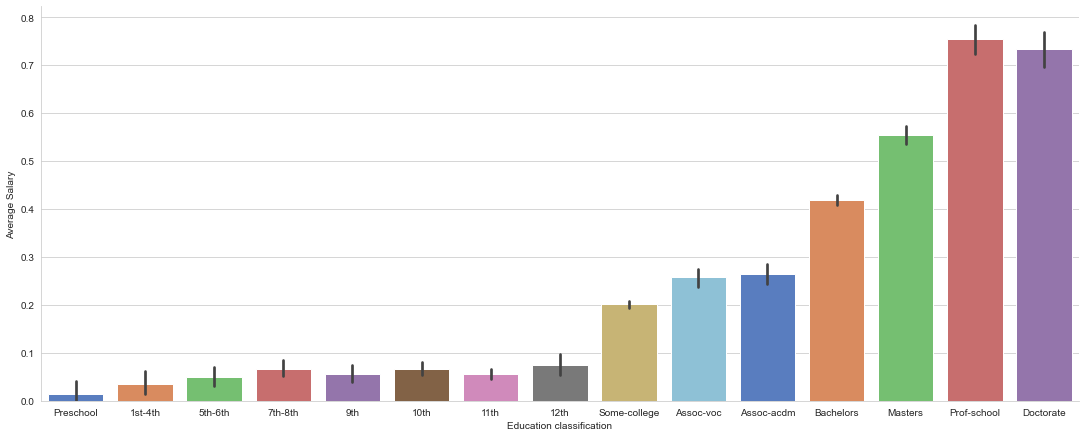

In [14]:
g = sns.catplot(x="education",y="salary-classification",data=training,kind="bar", height = 6 , aspect = 2.5,
palette = "muted",order=["Preschool","1st-4th","5th-6th","7th-8th","9th","10th","11th","12th","Some-college","Assoc-voc","Assoc-acdm","Bachelors","Masters","Prof-school","Doctorate"])
g = g.set_ylabels("Average Salary")
g = g.set_xlabels("Education classification")
plt.show()

([<matplotlib.axis.XTick at 0x21a29293340>,
 [Text(0, 0, '17'),
  Text(1, 0, '18'),
  Text(2, 0, '19'),
  Text(3, 0, '20'),
  Text(4, 0, '21'),
  Text(5, 0, '22'),
  Text(6, 0, '23'),
  Text(7, 0, '24'),
  Text(8, 0, '25')])

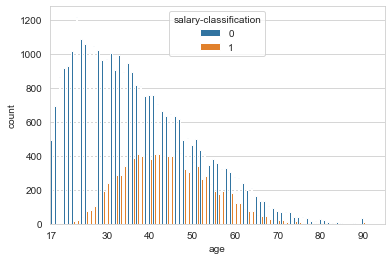

In [15]:
sal_age = sns.countplot( x="age", data=training, hue="salary-classification")
plt.xticks([0,13,23,33,43,53,63,73,78])

## Race vs Income

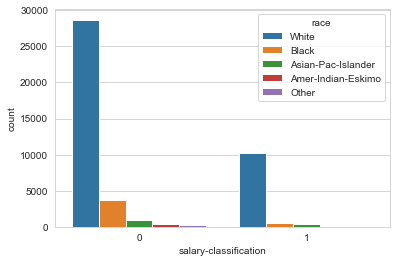

In [16]:
ri = sns.countplot( x="salary-classification", data=training, hue="race")

#ri.set_axis_labels("", "Count")

## Occupation vs Income

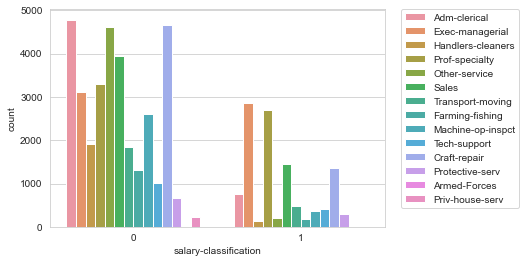

In [17]:
import matplotlib.pyplot as plt
ri = sns.countplot( x="salary-classification", data=training, hue="occupation")
plt.legend(bbox_to_anchor=(1.05, 1), loc=2, borderaxespad=0.)

In [18]:
treino_0null = pd.read_csv("training_0null.csv")
teste_0null = pd.read_csv("test_0null.csv")
merged = pd.concat([treino_0null, teste_0null], ignore_index=True)

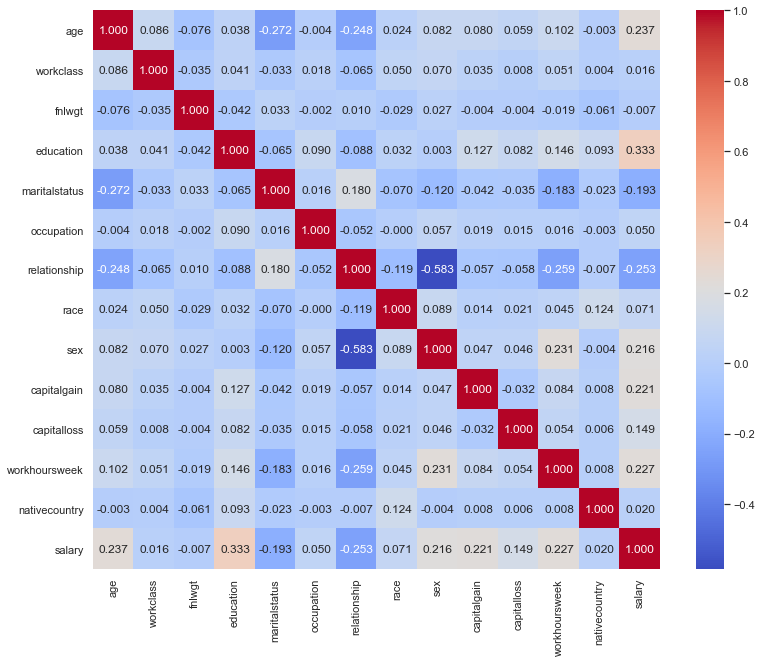

In [19]:
sns.set(rc={'figure.figsize':(12.7,10.27)})
n_values_graph = sns.heatmap(merged.corr(),annot=True,fmt = ".3f" ,cmap = "coolwarm")
plt.show()